# dataset

In [1]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from scripts.get_top_stocks import *
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
common_top_stocks = pd.read_csv('/Users/bryanwong/Projects/nus-dsa5205-project/stock_selection/top_30_stocks.csv')
common_top_stocks = set([
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "MU",
    "PDD",
])
common_top_stocks

{'BKNG', 'DDOG', 'MDB', 'MELI', 'MU', 'NVDA', 'PDD', 'SMCI', 'SNPS', 'WDAY'}

In [4]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
df.to_csv("temp.csv",index=False)

In [6]:
df = pd.read_csv("temp.csv")
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,1143.520020,1149.310059,1140.880005,1148.699951,1148.699951,56359,0.004301,-5.179932,8.430054,...,0.061762,0.060573,0.050565,110.387165,0.386080,1.370159,7.430054,-1.09,0.001218,MELI
1,2023-02-24 14:30:00-05:00,1148.979980,1154.618286,1147.060059,1150.099976,1150.099976,83519,0.001218,-1.119995,7.558228,...,0.062534,0.060658,0.051027,109.354844,0.385758,1.378678,6.558228,-1.09,0.005567,MELI
2,2023-02-24 15:30:00-05:00,1150.242310,1159.719971,1149.000000,1156.520020,1156.520020,166382,0.005567,-6.277710,10.719971,...,0.067897,0.065296,0.055665,108.203141,0.383855,1.406480,9.719971,-1.09,0.021420,MELI
3,2023-02-27 09:30:00-05:00,1172.839966,1184.093994,1153.369995,1181.560059,1181.560059,167677,0.021420,-8.720093,30.723999,...,0.090246,0.086966,0.076847,107.123490,0.387178,1.432385,29.723999,0.31,-0.007953,MELI
4,2023-02-27 10:30:00-05:00,1181.569946,1181.569946,1160.000122,1172.199951,1172.199951,69785,-0.007953,9.369995,21.569824,...,0.080922,0.077025,0.067420,106.018836,0.387825,1.414835,20.569824,0.31,-0.001981,MELI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,2024-07-31 10:30:00-04:00,114.129997,115.889999,114.050003,115.739998,115.739998,54324447,0.014256,-1.610001,1.839996,...,-0.022383,-0.065304,-0.063027,6.630986,0.571675,0.955826,0.839996,0.68,-0.002763,NVDA
25026,2024-07-31 11:30:00-04:00,115.730003,116.470001,115.410004,115.420601,115.420601,41236682,-0.002763,0.309402,1.059998,...,-0.024890,-0.067735,-0.065380,6.648481,0.571571,0.958146,0.059998,0.68,0.000861,NVDA
25027,2024-07-31 12:30:00-04:00,115.430000,116.029999,114.739998,115.519997,115.519997,31361626,0.000861,-0.089996,1.290001,...,-0.023868,-0.066808,-0.064402,6.663786,0.571376,0.964862,0.290001,0.68,0.006213,NVDA
25028,2024-07-31 13:30:00-04:00,115.529999,116.430000,114.250000,116.239998,116.239998,37471590,0.006213,-0.709999,2.180000,...,-0.017648,-0.060887,-0.058384,6.675801,0.571601,0.970450,1.180000,0.68,-0.001420,NVDA


In [7]:
# functions to add target column to df

def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [8]:
# create target column

# percentile_list = [20,40,60,80]
percentile_list = [33, 66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df, percentile_list, labels)

/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_22636/1988958013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_22636/1988958013.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipyker

In [9]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0
0
0


In [10]:
features = df.columns[8:-4]

# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)
df1 = df1[(np.abs(stats.zscore(df1[features])) < 4).all(axis=1)]
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,EMAVolumeDiff2,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,2.253500e+04,22535.000000,22535.000000,22535.000000,22535.000000,...,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000
mean,577.170653,579.362584,574.896847,577.172026,577.172026,1.377540e+06,0.000136,-0.001373,4.465737,-0.038758,...,-0.087386,0.030263,0.030185,0.027615,26.044461,0.414533,1.077984,3.465737,0.133200,0.000262
std,868.414422,870.727078,865.997226,868.455220,868.455220,4.345995e+06,0.007567,4.368493,6.159843,0.170042,...,0.597610,0.076192,0.088369,0.081585,33.893013,0.163581,0.177852,6.159843,0.770742,0.011169
min,22.488001,22.783991,22.297001,22.584351,22.584351,5.137000e+03,-0.045865,-27.170166,0.000000,-0.683274,...,-0.896330,-0.282735,-0.327839,-0.248859,0.744800,0.164101,0.571536,-1.000000,-2.020000,-0.290849
25%,95.285000,95.787502,94.752773,95.299999,95.299999,8.244400e+04,-0.003326,-0.750000,0.779999,-0.164774,...,-0.489777,-0.018570,-0.025676,-0.024694,5.379084,0.298057,0.968154,-0.220001,-0.330000,-0.003403
50%,225.500000,226.850006,224.630005,225.669998,225.669998,2.522590e+05,0.000152,-0.013988,1.869995,-0.046511,...,-0.259465,0.026865,0.025556,0.024707,11.257054,0.372533,1.059466,0.869995,0.150000,0.000170
75%,517.684692,519.737488,516.290009,517.589996,517.589996,8.874765e+05,0.003549,0.702499,5.260002,0.088056,...,0.126852,0.071617,0.074980,0.070972,30.469538,0.518047,1.155893,4.260002,0.680000,0.003658
max,4135.640137,4144.319824,4126.919922,4142.520020,4142.520020,1.032230e+08,0.045565,27.369995,43.375000,0.399478,...,4.099551,0.356976,0.405505,0.371907,193.621612,1.188706,2.155926,42.375000,2.180000,0.264883


In [11]:
# train test split on index
train_size, val_size, test_size = 0.6048, 0.332, 0.0632
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape, val_df.shape, test_df.shape

((13629, 80), (7481, 80), (1425, 80))

In [12]:
test_df.Target.value_counts()

Target
0    515
1    461
2    449
Name: count, dtype: int64

In [13]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'OMC', 'HML', 'EMAVolumeDiff2', 'SMAVolumeDiff2',
        'EMACloseDiff2', 'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2',
        'Volatility2', 'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4',
        'EMACloseDiff4', 'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4',
        'Volatility4', 'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8',
        'EMACloseDiff8', 'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8',
        'Volatility8', 'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16',
        'EMACloseDiff16', 'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16',
        'Volatility16', 'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32',
        'EMACloseDiff32', 'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32',
        'Volatility32', 'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64',
        'EMACloseDiff64', 'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64',
        'Volatility64', 'Momentum64', '

In [14]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

68
(13629, 68) (13629,)
(7481, 68) (7481,)
(1425, 68) (1425,)


In [15]:
val_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,...,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
14894,2024-01-02 12:30:00-05:00,268.679993,268.959991,266.059998,266.774994,266.774994,116979,-0.007357,1.904999,2.899994,...,0.029937,20.197017,0.318540,1.209261,1.899994,-0.70,0.002415,WDAY,buy,2
14895,2024-01-02 12:30:00-05:00,284.730011,287.000000,284.079987,285.429993,285.429993,134187,0.001859,-0.699982,2.920013,...,0.005100,17.693076,0.565116,1.116400,1.920013,-0.70,-0.002930,SMCI,hold,1
14896,2024-01-02 12:30:00-05:00,48.115948,48.348000,47.879997,48.185997,48.185997,4118649,0.001609,-0.070049,0.468002,...,0.000072,1.305148,0.304893,1.050548,-0.531998,-0.70,0.000042,NVDA,hold,1
14897,2024-01-02 12:30:00-05:00,115.730003,115.889999,114.949997,115.839996,115.839996,505231,0.001382,-0.109993,0.940002,...,0.030403,6.598336,0.288792,1.123787,-0.059998,-0.70,-0.003095,DDOG,sell,0
14898,2024-01-02 12:30:00-05:00,83.070000,83.199997,82.584999,82.985001,82.985001,1114606,-0.000903,0.084999,0.614998,...,0.046132,4.262499,0.348826,1.144305,-0.385002,-0.70,-0.004469,MU,sell,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,2024-06-28 11:30:00-04:00,128.899994,129.820007,128.750000,129.309998,129.309998,389439,0.003021,-0.410004,1.070007,...,0.109347,4.876326,0.423118,1.025700,0.070007,0.68,-0.003168,DDOG,sell,0
23495,2024-06-28 11:30:00-04:00,4000.000000,4008.750000,3985.959961,3985.959961,3985.959961,10459,-0.002170,14.040039,22.790039,...,0.046882,104.284621,0.180890,1.118530,21.790039,0.68,-0.003949,BKNG,sell,0
23496,2024-06-28 11:30:00-04:00,134.574997,135.639999,133.279999,133.309998,133.309998,1220107,-0.009556,1.264999,2.360001,...,-0.090716,5.730520,0.389277,0.962041,1.360001,0.68,-0.002967,PDD,sell,0
23497,2024-06-28 11:30:00-04:00,125.955002,126.489998,124.269997,124.705002,124.705002,31025455,-0.010013,1.250000,2.220001,...,0.016209,15.171351,0.497095,1.355784,1.220001,0.68,-0.004984,NVDA,sell,0


In [16]:
# standardise the values and PCA
# from scripts.train_predict import *

# # standardise the values and selectKbest
# scaler = StandardScaler()
# pca = PCA(n_components = 0.95)

# # Fit the scaler on the training data and transform the training data
# X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)

# # Transform the validation data
# X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)

# # Transform the test data
# X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)

# X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

# standardise the values and selectKbest
from scripts.train_predict import *
from sklearn.feature_selection import SelectKBest, chi2

scaler = StandardScaler()
selector = SelectKBest(k=20)
# pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
# X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
# X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
# X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((13629, 20), (13629,), (7481, 20), (7481,), (1425, 20), (1425,))

In [17]:
# sample check

X_train[100],y_train[100]

(array([ 0.38208581, -0.11455125,  0.63178433,  0.48918327,  0.63577889,
         0.78083461,  0.38132052,  0.53505483,  0.08653853,  0.42280718,
         0.66322323,  0.53111743, -0.13513812,  0.99617126,  1.2489135 ,
         1.24067528,  1.40763039,  1.19001839,  1.14839663, -0.39140977]),
 2)

In [18]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    4618
1    4586
0    4425
Name: count, dtype: int64
Target
1    2549
2    2521
0    2411
Name: count, dtype: int64
Target
0    515
1    461
2    449
Name: count, dtype: int64


# model

In [19]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = 0
    best_params = None
    best_model = None
    

    param_grid = {
        'hidden_layer_sizes': [(16),(32),(8,16),(8,32),(32,16),(32,8)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if score > best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, best_score, acc, y_pred
    

In [20]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4118433
|████████████████████████████████████████| 6/6 [100%] in 14.8s (0.40/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': 16, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.41184
Test set accuracy score: 0.37474


In [21]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 43, 1: 700, 2: 682}

accuracy: 37.47


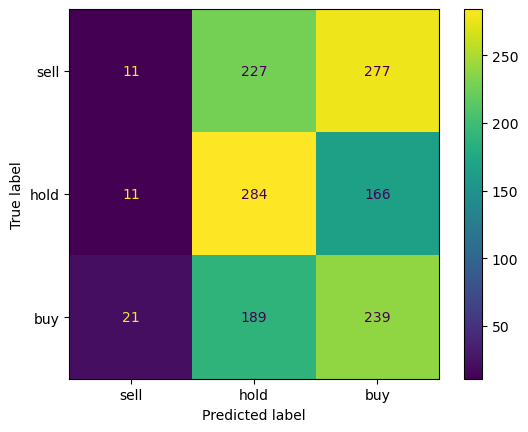

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc * 100, 2)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [23]:
X_test.shape

(1425, 20)

In [24]:
test_df.shape

(1425, 80)

In [25]:
## predict on indiv stocks
final = []

for stock_name in test_df.stock_name.unique()[:-1]:
    stock_df = test_df[test_df['stock_name'] == stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    stock_X_test = scaler.transform(stock_X_test)
    stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)
    stock_y_test = stock_df[target].to_numpy()
    
    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    y = []
    
    for i, v in enumerate(stock_y_test):
        if stock_y_test[i] == 1 or stock_preds[i] == 1:
            continue
        if stock_y_test[i] == stock_preds[i]:
            y.append(1)
        else:
            y.append(0)
    
    num_correct = sum([1 for x in y if x == 1])
    num_wrong = sum([1 for x in y if x == 0])
    
    relevant_acc = num_wrong / (num_correct + num_wrong)
    final.append((relevant_acc, stock_name))
    
    print(f"{stock_name}: {round(acc*100,2)} | {relevant_acc}")

final.sort()
final
# choose top 10 from here

WDAY: 36.36 | 0.5652173913043478
BKNG: 40.21 | 0.5483870967741935
SMCI: 37.41 | 0.5614035087719298
DDOG: 40.79 | 0.49206349206349204
PDD: 39.86 | 0.5681818181818182
NVDA: 37.5 | 0.56
SNPS: 38.93 | 0.5633802816901409
MU: 34.67 | 0.5925925925925926
MDB: 30.67 | 0.5925925925925926


[(0.49206349206349204, 'DDOG'),
 (0.5483870967741935, 'BKNG'),
 (0.56, 'NVDA'),
 (0.5614035087719298, 'SMCI'),
 (0.5633802816901409, 'SNPS'),
 (0.5652173913043478, 'WDAY'),
 (0.5681818181818182, 'PDD'),
 (0.5925925925925926, 'MDB'),
 (0.5925925925925926, 'MU')]

In [26]:
y

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [27]:
import pandas as pd
from datetime import datetime

model = best_model

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "MU",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]

def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()
        # stock_X_test = pca.transform(stock_X_test)
        stock_X_test = scaler.transform(stock_X_test)
        stock_X_test = selector.transform(stock_X_test)
        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model.predict(stock_X_test)

        res[ticker] = pd.Series(stock_preds)
        # print(len(stock_X_test))
        
    res = res.replace({0:-1, 1:0, 2:1})
    res['Date'] = test_df.Datetime.unique()
    res = res.set_index('Date')
    res = res.astype('int16')
    res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    res = res.div(res['total'], axis=0)
    res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model)
res

/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_22636/3431555013.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,MELI,SNPS,PDD,DDOG,MDB,MU,BKNG,SMCI,WDAY,NVDA
Date,,,,,,,,,,
2024-07-01 09:30:00-04:00,0.111111,0.111111,0.111111,0.111111,0.111111,-0.111111,0.111111,0.111111,0.0,-0.111111
2024-07-01 10:30:00-04:00,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.125000,-0.125000,0.0,0.125000
2024-07-01 11:30:00-04:00,0.000000,0.000000,0.200000,0.000000,0.200000,0.200000,0.000000,-0.200000,0.0,0.200000
2024-07-01 12:30:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.500000
2024-07-01 13:30:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:30:00-04:00,0.100000,0.100000,0.100000,0.100000,0.100000,-0.100000,0.100000,0.100000,0.1,0.100000
2024-07-31 11:30:00-04:00,0.000000,0.166667,0.000000,0.000000,0.166667,-0.166667,0.166667,-0.166667,0.0,-0.166667
2024-07-31 12:30:00-04:00,0.000000,0.250000,0.000000,0.000000,0.000000,-0.250000,0.000000,-0.250000,0.0,-0.250000


In [28]:
a = res.dropna()
a.to_csv('fcn-best-bryan.csv')

In [29]:
res.to_csv('fcn-best-bryan.csv')

In [30]:
a

,MELI,SNPS,PDD,DDOG,MDB,MU,BKNG,SMCI,WDAY,NVDA
Date,,,,,,,,,,
2024-07-01 09:30:00-04:00,0.111111,0.111111,0.111111,0.111111,0.111111,-0.111111,0.111111,0.111111,0.0,-0.111111
2024-07-01 10:30:00-04:00,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.125000,-0.125000,0.0,0.125000
2024-07-01 11:30:00-04:00,0.000000,0.000000,0.200000,0.000000,0.200000,0.200000,0.000000,-0.200000,0.0,0.200000
2024-07-01 12:30:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.500000
2024-07-01 14:30:00-04:00,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:30:00-04:00,0.100000,0.100000,0.100000,0.100000,0.100000,-0.100000,0.100000,0.100000,0.1,0.100000
2024-07-31 11:30:00-04:00,0.000000,0.166667,0.000000,0.000000,0.166667,-0.166667,0.166667,-0.166667,0.0,-0.166667
2024-07-31 12:30:00-04:00,0.000000,0.250000,0.000000,0.000000,0.000000,-0.250000,0.000000,-0.250000,0.0,-0.250000


In [31]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,...,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,1143.520020,1149.310059,1140.880005,1148.699951,1148.699951,56359,0.004301,-5.179932,8.430054,...,0.050565,110.387165,0.386080,1.370159,7.430054,-1.09,0.001218,MELI,hold,1
1,2023-02-24 14:30:00-05:00,1148.979980,1154.618286,1147.060059,1150.099976,1150.099976,83519,0.001218,-1.119995,7.558228,...,0.051027,109.354844,0.385758,1.378678,6.558228,-1.09,0.005567,MELI,buy,2
2,2023-02-24 15:30:00-05:00,1150.242310,1159.719971,1149.000000,1156.520020,1156.520020,166382,0.005567,-6.277710,10.719971,...,0.055665,108.203141,0.383855,1.406480,9.719971,-1.09,0.021420,MELI,buy,2
3,2023-02-27 09:30:00-05:00,1172.839966,1184.093994,1153.369995,1181.560059,1181.560059,167677,0.021420,-8.720093,30.723999,...,0.076847,107.123490,0.387178,1.432385,29.723999,0.31,-0.007953,MELI,sell,0
4,2023-02-27 10:30:00-05:00,1181.569946,1181.569946,1160.000122,1172.199951,1172.199951,69785,-0.007953,9.369995,21.569824,...,0.067420,106.018836,0.387825,1.414835,20.569824,0.31,-0.001981,MELI,hold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,2024-07-31 10:30:00-04:00,114.129997,115.889999,114.050003,115.739998,115.739998,54324447,0.014256,-1.610001,1.839996,...,-0.063027,6.630986,0.571675,0.955826,0.839996,0.68,-0.002763,NVDA,sell,0
25026,2024-07-31 11:30:00-04:00,115.730003,116.470001,115.410004,115.420601,115.420601,41236682,-0.002763,0.309402,1.059998,...,-0.065380,6.648481,0.571571,0.958146,0.059998,0.68,0.000861,NVDA,hold,1
25027,2024-07-31 12:30:00-04:00,115.430000,116.029999,114.739998,115.519997,115.519997,31361626,0.000861,-0.089996,1.290001,...,-0.064402,6.663786,0.571376,0.964862,0.290001,0.68,0.006213,NVDA,buy,2
25028,2024-07-31 13:30:00-04:00,115.529999,116.430000,114.250000,116.239998,116.239998,37471590,0.006213,-0.709999,2.180000,...,-0.058384,6.675801,0.571601,0.970450,1.180000,0.68,-0.001420,NVDA,hold,1


<Axes: xlabel='Datetime'>

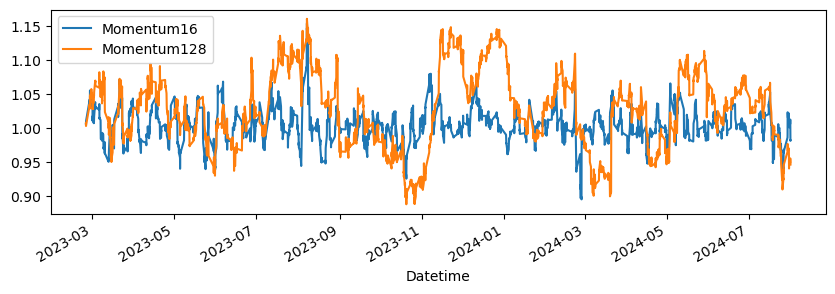

In [32]:
df[
    df['stock_name'] == 'BKNG'
].set_index('Datetime')[['Momentum16', 'Momentum128']].plot(figsize=(10,3))

In [33]:
selector

SelectKBest(k=20)